**Price prediction Model developed for UNL, Nepal**

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

#Read Data

In [ ]:
df=pd.read_csv('/content/UNLARIMA.csv',index_col='Date',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head(97)

Shape of data (952, 2)


,Symbol,Close
Date,,
2023-08-17,UNL,36000.0
2023-08-16,UNL,36949.0
2023-08-15,UNL,37200.0
2023-08-14,UNL,38014.2
2023-08-13,UNL,37300.0
...,...,...
2023-04-05,UNL,21503.0
2023-04-04,UNL,21500.0
2023-04-03,UNL,21500.0


In [ ]:


# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(df)


           Symbol    Close
Date                      
2017-01-01    UNL  27000.0
2017-01-18    UNL  27000.0
2017-01-22    UNL  27540.0
2017-01-23    UNL  28090.0
2017-01-25    UNL  28651.0
2017-01-31    UNL  29000.0
2017-02-22    UNL  29000.0
2017-02-28    UNL  29000.0
2017-03-01    UNL  29000.0
2017-03-05    UNL  30000.0
2017-03-06    UNL  30200.0
2017-03-13    UNL  30200.0
2017-03-30    UNL  29988.0
2017-04-02    UNL  30587.0
2017-04-09    UNL  29976.0
2017-04-16    UNL  28812.0
2017-04-18    UNL  29000.0
2017-04-20    UNL  29000.0
2017-04-23    UNL  29580.0
2017-04-26    UNL  29000.0
2017-04-30    UNL  29580.0
2017-05-02    UNL  29580.0
2017-05-18    UNL  29580.0
2017-05-28    UNL  29580.0
2017-06-05    UNL  30170.0
2017-06-08    UNL  30000.0
2017-06-11    UNL  30000.0
2017-06-14    UNL  29400.0
2017-07-02    UNL  29000.0
2017-07-09    UNL  29000.0
2017-07-10    UNL  30069.0
2017-07-13    UNL  29204.0
2017-07-16    UNL  29200.0
2017-07-17    UNL  29200.0
2017-07-19    UNL  28700.0
2

#Plot Your Data

<Axes: xlabel='Date'>

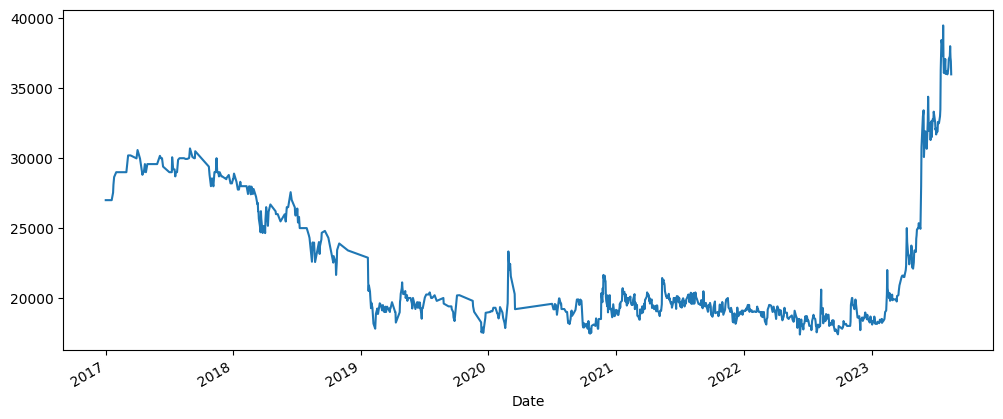

In [ ]:
df['Close'].plot(figsize=(12,5))

#Check For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['Close'])

1. ADF :  -3.2612467298283345
2. P-Value :  0.016702148727434578
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 946
5. Critical Values :
	 1% :  -3.437281430175827
	 5% :  -2.8646000638781532
	 10% :  -2.5683993544869015


**Here, the P value is just above 0.05 because the number of records is very low i.e only 97. Had there been more records, the predictions would be very close to actual truth value.**

> Indented block



#Figure Out Order for ARIMA Model

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Close'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  952
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -7450.164
Date:                Sun, 20 Aug 2023   AIC                          14912.328
Time:                        03:00:50   BIC                          14941.467
Sample:                             0   HQIC                         14923.431
                                - 952                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6815      0.012    -57.513      0.000      -0.705      -0.658
ar.L2         -0.5537      0.017    -32.810      0.000      -0.587      -0.521
ar.L3         -0.3744      0.019    -20.062      0.000      -0.411      -0.338
ar.L4         -0.2572      0.020    -13.162      0.000      -0.295      -0.219
ar.L5         -0.1577      0.014    -11.547      0.000      -0.184      -0.131
sigma2       3.31e+05   8429.564     39.269      0.000    3.14e+05    3.48e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.84   Jarque-Bera (JB):              1412.06
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

**Make sure the iloc indexing number i.e 761 matches the number of test data in the prediction section below**

In [ ]:
print(df.shape)
train=df.iloc[:-761]
test=df.iloc[-761:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(952, 2)
(191, 2) (761, 2)
Symbol        UNL
Close     17800.0
Name: 2022-10-09 00:00:00, dtype: object Symbol        UNL
Close     27000.0
Name: 2017-01-01 00:00:00, dtype: object


## Train the Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Close'], order=(1, 0, 5))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  191
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -1528.295
Date:                Sun, 20 Aug 2023   AIC                           3072.591
Time:                        03:16:13   BIC                           3098.609
Sample:                             0   HQIC                          3083.129
                                - 191                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.459e+04   9305.824      2.642      0.008    6347.228    4.28e+04
ar.L1          0.9969      0.008    130.826      0.000       0.982       1.012
ma.L1          0.1477      0.055      2.677      0.0

#Make Predictions on Test Set

**Make sure the iloc indexing number i.e 71 matches the number of test data in the prediction section below. The number of dates (start='2023-06-01', end='2023-08-10') should be 71**

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

**Make sure the iloc indexing number i.e 71 matches the number of test data in the prediction section below. The number of dates (start='2023-06-01', end='2023-08-10') should be 71 DATE WISE NOT ROW WISE

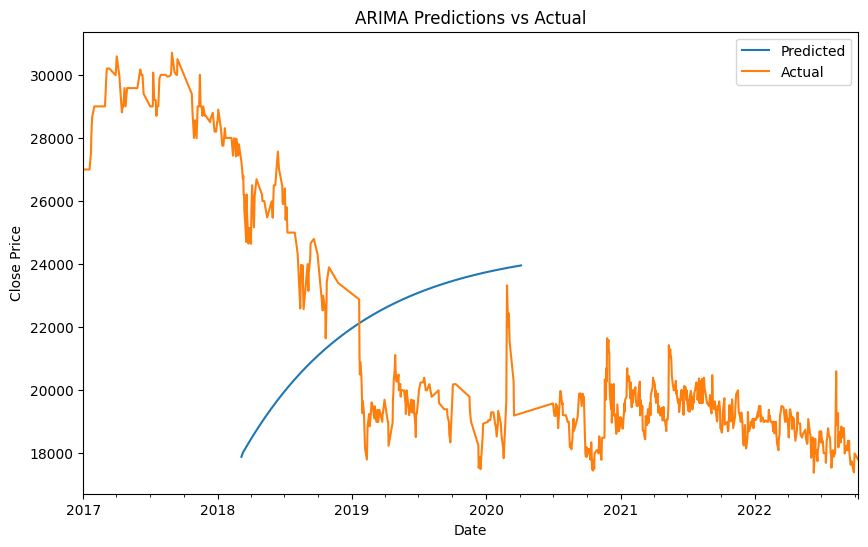

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have defined the train DataFrame and model_fit as in your previous code

start = len(train)
end = len(train) + len(test) - 1

# Make predictions using the fitted model
pred = model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA predictions')

# Extend the predicted values to match the full range of index_future_dates
index_future_dates = pd.date_range(start='2018-03-07', end='2020-04-05')
extended_pred = pd.Series(data=pred.values, index=index_future_dates)

# Plotting
plt.figure(figsize=(10, 6))
ax = extended_pred.plot(legend=True, label='Predicted')
test['Close'].plot(legend=True, ax=ax, label='Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Predictions vs Actual')
plt.legend()

plt.show()


In [ ]:
test['Close'].mean()

20874.513666228646

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Close']))
print(rmse)


3101.484790257931


In [ ]:
model2=ARIMA(df['Close'],order=(1,0,5))
model2=model2.fit()
df.tail()

,Symbol,Close
Date,,
2017-01-25,UNL,28651.0
2017-01-23,UNL,28090.0
2017-01-22,UNL,27540.0
2017-01-18,UNL,27000.0
2017-01-01,UNL,27000.0


#For Future Dates

IMPORTANT

pred=model2.predict(start=len(df),end=**len(df)+30**, this should match the future number of dates, it means that 2023-08-10 plus 30 days.

In [ ]:

index_future_dates=pd.date_range(start='2023-08-17',end='2023-09-16')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2023-08-17    27107.176821
2023-08-18    27196.558424
2023-08-19    27266.179057
2023-08-20    27311.064561
2023-08-21    27311.364530
2023-08-22    27305.031901
2023-08-23    27298.706317
2023-08-24    27292.387770
2023-08-25    27286.076253
2023-08-26    27279.771758
2023-08-27    27273.474276
2023-08-28    27267.183800
2023-08-29    27260.900323
2023-08-30    27254.623836
2023-08-31    27248.354332
2023-09-01    27242.091803
2023-09-02    27235.836242
2023-09-03    27229.587639
2023-09-04    27223.345989
2023-09-05    27217.111282
2023-09-06    27210.883511
2023-09-07    27204.662670
2023-09-08    27198.448748
2023-09-09    27192.241740
2023-09-10    27186.041638
2023-09-11    27179.848433
2023-09-12    27173.662118
2023-09-13    27167.482686
2023-09-14    27161.310129
2023-09-15    27155.144438
2023-09-16    27148.985607
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

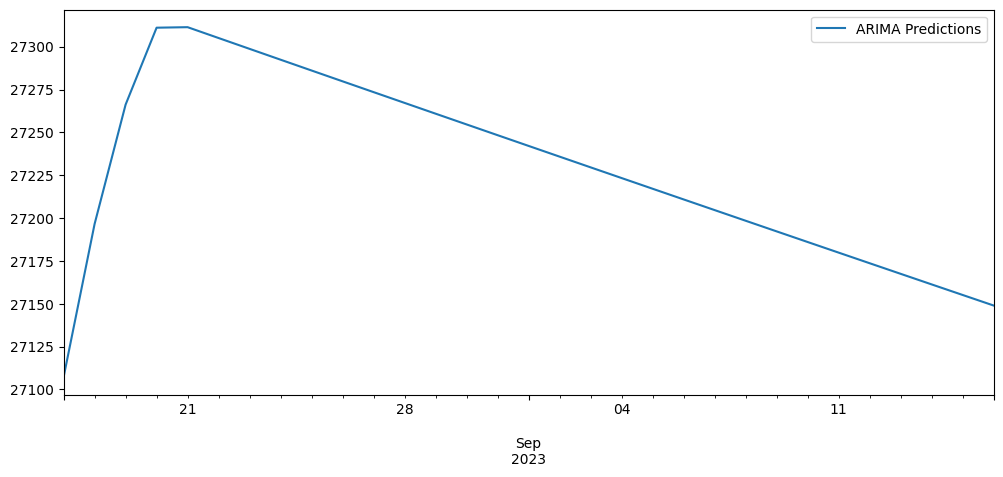

In [ ]:
pred.plot(figsize=(12,5),legend=True)
